# Quantifying Diabetes Risk

## Introduction


Diabetes mellitus, a chronic metabolic disorder characterized by elevated blood glucose levels, has become a global health concern of alarming proportions. As of the latest available statistics, it is estimated that more than 400 million people worldwide are living with diabetes, and this number is expected to continue its upward trajectory in the coming years. Diabetes not only poses a significant threat to an individual's health and quality of life but also places a considerable burden on healthcare systems and economies.

Understanding and quantifying the risk factors associated with diabetes is of paramount importance for early diagnosis, effective prevention, and improved management of the disease. In this exploratory data analysis (EDA), we delve into a comprehensive dataset that encompasses a range of attributes, each potentially contributing to the risk of diabetes.

The primary objective of this analysis is to gain valuable insights into the factors that influence diabetes occurrence. Furthermore, our aim is to establish a strong foundation for subsequent analysis with predictive models, which can play a pivotal role in identifying individuals at higher risk.

Our journey in quantifying diabetes risk commences with data exploration, visualization, and statistical analysis. Through these techniques, we aim to uncover patterns, correlations, and potential outliers within the dataset. We will also assess the distribution of diabetes cases within our sample and examine the influence of individual attributes on the likelihood of diabetes occurrence. Let's begin

## About data set


The dataset at the heart of our investigation includes several key variables, each offering a unique perspective on an individual's health and genetic predisposition to diabetes. These variables

This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes.

### Columns:

1) Id: This column serves as a unique identifier for each data entry. It is used to distinguish individual records within the dataset but typically doesn't provide any meaningful information for analysis. It's often useful for indexing or tracking specific data points.

2) Pregnancies: This column represents the number of times a person has been pregnant. It is a numeric variable that can range from 0 (no pregnancies) to higher values, indicating the number of pregnancies a person has experienced.

3) Glucose: This column records the plasma glucose concentration measured over 2 hours during an oral glucose tolerance test. It is a measure of blood sugar levels and is typically expressed in milligrams per deciliter (mg/dL). High glucose levels can be indicative of diabetes.

4) BloodPressure: Diastolic blood pressure is recorded in this column, measured in millimeters of mercury (mm Hg). Diastolic blood pressure represents the pressure in the arteries when the heart is at rest between beats.


5) SkinThickness: Triceps skinfold thickness is measured in millimeters (mm). It is a measure of subcutaneous fat and can be used to assess body composition.

6) Insulin: This column records the 2-hour serum insulin level, measured in micro international units per milliliter (mu U/ml). It reflects the amount of insulin in the bloodstream after a glucose tolerance test. Abnormal insulin levels can be associated with diabetes.

7) BMI (Body Mass Index): BMI is a calculated value derived from a person's weight (in kilograms) divided by the square of their height (in meters squared). It is used to assess whether a person's weight is within a healthy range or if they are underweight or overweight. It can be an important factor related to diabetes risk since obesity is a risk factor for diabetes.

8) DiabetesPedigreeFunction: This column represents the Diabetes Pedigree Function, which is a numeric score that assesses the genetic predisposition or family history of diabetes in an individual. It is a way to quantify the hereditary risk of diabetes.

9) Age: This column records the age of the individuals in years. Age can be an important factor in assessing diabetes risk because the likelihood of developing diabetes often increases with age.

10) Outcome: This is the target variable or the variable we aim to predict in a binary classification context. It indicates the presence or absence of diabetes, with 1 typically denoting the presence of diabetes, and 0 denoting its absence. It's an important column for building predictive models in diabetes research.

## How to run the code


We'll analyze the Diabetes Prediction Dataset. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. You can find the raw data here: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes.

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the opendatasets helper library to download the files.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?select=Healthcare-Diabetes.csv'

To access the dataset used in this analysis, it is necessary to have valid credentials from Kaggle, a prominent platform for data science and machine learning enthusiasts. Kaggle provides a wide range of datasets, including the one used in our research, to facilitate collaborative and exploratory data analysis.

Learn more: http://bit.ly/kaggle-creds

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juancarloslorenzo
Your Kaggle Key: ········


100%|██████████| 26.7k/26.7k [00:00<00:00, 171kB/s]

The dataset has been downloaded and extracted.

Let's verify that the dataset was downloaded into the directory and retrieve the list of files in the dataset.

In [ ]:
data_dir = 'healthcare-diabetes'

In [ ]:
import os
os.listdir(data_dir)

['Healthcare-Diabetes.csv']

You can through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains one file:

Healthcare-Diabetes.csv


## Data Preparation and Cleaning


In our pursuit to quantify diabetes risk accurately, we recognize that the raw dataset we obtained may require refinement and meticulous preparation. This section is dedicated to the essential task of data preparation and cleaning, a critical phase in any data analysis endeavor.

Before we can uncover meaningful patterns and insights, we must ensure that our data is free from inconsistencies, inaccuracies, and missing values. Furthermore, we will transform and structure the data in a way that facilitates our subsequent analyses. The quality of our results and the reliability of any predictive models we develop depend significantly on the integrity of the dataset.

This section is divided into several key parts, each addressing a crucial aspect of data preparation:
* Load the dataset into a data frame using Pandas:Before we can begin our analysis, we need to import the dataset into a Pandas data frame. This initial step sets the stage for all subsequent operations.
* Explore the number of rows & columns, ranges of values etc.:Understanding the structure and characteristics of our dataset is paramount. We will delve into its dimensions, variable types, and ranges of values to gain insights into the data we are working with.
* Handle missing, incorrect and invalid data: Data imperfections are a common challenge in any real-world dataset. In this section, we will employ various techniques to address missing values, correct inaccuracies, and identify and handle invalid data entries
* Perform any additional steps, such as creating additional columns: Depending on the specific research questions and hypotheses we aim to explore, we may need to derive additional features or columns from the existing data. This step allows us to customize our dataset to suit our analytical objectives.

### Load the dataset into a data frame using Pandas


In [ ]:
# We can now import the modules we will use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's load the CSV files using the Pandas library. We'll use the name **diabetes_raw_df** for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
diabetes_raw_df = pd.read_csv(data_dir+"/Healthcare-Diabetes.csv")

In [ ]:
type(diabetes_raw_df)

pandas.core.frame.DataFrame

In [ ]:
diabetes_raw_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


The dataset contains over 2768 cases and 10 columns which contain a diverse range of health-related attributes. It's important to note that the cases have been anonymized to remove personally identifiable information, and each case has been assigned a randomized respondent ID. This safeguards the privacy and confidentiality of the individuals from whom the data was originally collected.



### Explore the number of rows & columns, ranges of values etc.

Let's view the list of columns in the data frame.

In [ ]:
diabetes_raw_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_raw_df.shape

(2768, 10)

Let's extract a copy of the data into a new data frame df. We can continue to modify further without affecting the original data frame.

In [ ]:
df= diabetes_raw_df.copy()

In [ ]:
df.drop('Id',axis=1,inplace=True)

Let's view some basic information about the data frame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


All columns have numeric values (int or float).

It appears that non-column contains any empty values since the Non-Null count for every column is the same that the total number of rows (2768).

Let's now view some basic statistics about numeric columns.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


It has come to our attention that several columns, including Glucose, BloodPressure, SkinThickness, Insulin, and BMI, exhibit anomalous values. Specifically, the minimum value in these columns is recorded as 0. In the context of health-related attributes, a value of 0 in these fields could potentially indicate missing data, as it is implausible for physiological measurements to be precisely zero.

Furthermore, the column representing Insulin levels raises concerns, as it shows a maximum value of 846. Such high values are highly improbable and may be indicative of invalid data entries, potentially resulting from accidental or intentional errors during data collection or recording.

The presence of missing or invalid values can significantly impact the reliability and accuracy of our analysis. In the subsequent sections of this data preparation and cleaning process, we will address these issues systematically, implementing techniques to handle missing data and evaluate the validity of extreme values in order to ensure the integrity of our dataset for further analysis.

### Handle missing, incorrect and invalid data


Let's check for duplicated values

In [ ]:
df.duplicated().value_counts()

True     1990
False     778
dtype: int64

In our dataset we identified a significant number of duplicate rows. Specifically, there are 1990 duplicate rows and 778 unique rows. Duplicate rows in a dataset can skew analysis results and potentially lead to inaccurate conclusions. In the following sections of this data preparation phase, we will systematically address these duplicates to ensure the quality and reliability of our dataset for further analysis.

In [ ]:
# Remove duplicated rows and keep the first occurrence
df = df.drop_duplicates()

# If you want to reset the index after removing duplicates
df.reset_index(drop=True, inplace=True)

We need to find out how many percentage of missing values in each variable.

In [ ]:
def porcentage(value,total):
    porcent=(value/total)*100
    return porcent

In [ ]:
# Count number of zeros in all columns of Dataframe
total_df=len(df)
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    porcent= round(porcentage(count,total_df),2)
    print('Count of zeros in column {} is : {} / {}; {} %'.format(column_name, count, total_df,porcent))

Count of zeros in column Pregnancies is : 114 / 778; 14.65 %
Count of zeros in column Glucose is : 5 / 778; 0.64 %
Count of zeros in column BloodPressure is : 36 / 778; 4.63 %
Count of zeros in column SkinThickness is : 229 / 778; 29.43 %
Count of zeros in column Insulin is : 377 / 778; 48.46 %
Count of zeros in column BMI is : 11 / 778; 1.41 %
Count of zeros in column DiabetesPedigreeFunction is : 0 / 778; 0.0 %
Count of zeros in column Age is : 0 / 778; 0.0 %
Count of zeros in column Outcome is : 506 / 778; 65.04 %


In our data exploration, we identified certain columns, including 'BloodPressure,' 'Insulin,' 'SkinThickness,' 'BMI,' and 'Glucose,' where values of 0 were recorded. Given the context of these health-related attributes, a value of 0 is not meaningful and is more likely to represent missing or unrecorded data. To address this issue and maintain data integrity, we have decided to replace these 0 values with 'NaN' (Not a Number).

In [ ]:
# Replace 0 values with NaN in the specified columns
columns_to_clean = ['BloodPressure', 'Insulin', 'SkinThickness','BMI','Glucose']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

In the columns 'BMI,' 'BloodPressure,' and 'Glucose,' we encountered a relatively low percentage of missing values after replacing the original 0 values with 'NaN.' Given the limited impact of these missing values on the overall distribution of the columns, we have opted to impute these missing values with the median.

In [ ]:
median_value_BMI = df['BMI'].median()
df['BMI'].fillna(median_value_BMI, inplace=True)

median_value_BloodPressure = df['BloodPressure'].median()
df['BloodPressure'].fillna(median_value_BloodPressure, inplace=True)

median_value_Glucose = df['Glucose'].median()
df['Glucose'].fillna(median_value_Glucose, inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               229
Insulin                     377
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In the columns 'Skin Thickness' and 'Insulin,' we encountered a substantial number of missing values, far exceeding the threshold at which straightforward imputation methods would be appropriate. Addressing the missing data in these columns would require extensive and complex procedures that go beyond the scope of this analysis.

While various imputation techniques exist to handle missing data, the suitability of each method depends on the specific context and goals of the analysis.

In our case, given the complexity and the sheer volume of missing data in these columns, we have made the decision not to impute these missing values. Instead, we will proceed with the analysis, recognizing that these columns may have limited utility. It's important to exercise caution when dealing with missing data, and in some instances, it may be more informative to exclude variables with a high proportion of missing values from further analysis. This ensures that our subsequent analyses are based on a dataset that remains as reliable and informative as possible given the data at hand.

Let's analyse histograms for some columns, this can provide valuable insights into the distribution and characteristics of each variable.

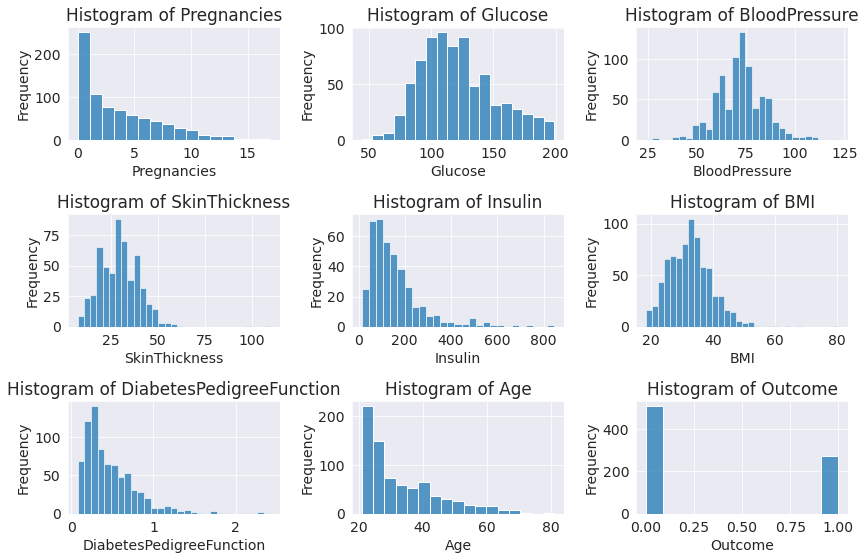

In [ ]:
# Select numerical features for the histogram
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 plots
    sns.histplot(df[feature])  # Create the histogram
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Here, we present the distributions of values for each column in our dataset. In the subsequent sections, we will endeavor to establish relationships between these distributions and our target variable, 'Outcome,' which indicates the presence or absence of diabetes.

Notably, in the case of 'BloodPressure,' 'Insulin,' and 'DiabetesPedigreeFunction,' keen observers may notice the presence of data points that significantly deviate from the general trend. These extreme values could potentially indicate the presence of outliers in our dataset. To gain a more visual and comprehensive understanding of these outliers, we will utilize box plots, a valuable tool for detecting and visualizing the spread and distribution of data points, especially those lying outside the norm

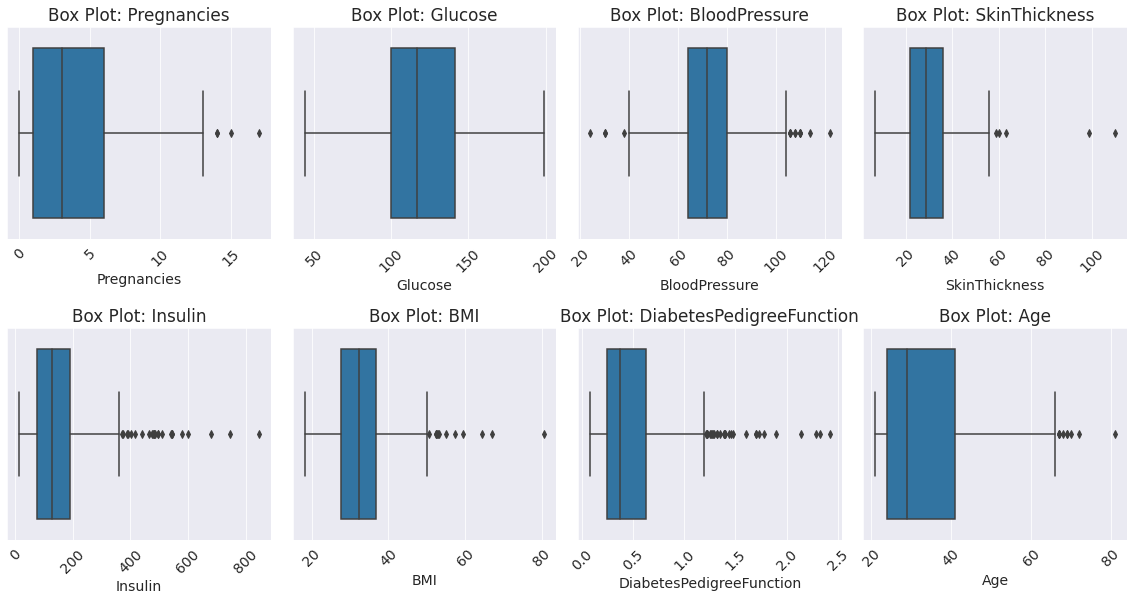

In [ ]:
# Box plots
plt.figure(figsize=(16, 12))
numeric_columns_1=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
for i, col in enumerate(numeric_columns_1, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot: {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In the course of our data analysis, we have identified potential outliers within specific columns of our dataset. Outliers, which are data points that significantly deviate from the general trend or distribution of a variable, demand careful consideration due to their potential to impact the accuracy and reliability of our analysis.

Outliers in medical and health-related data, such as the exceptionally low diastolic blood pressure values we've encountered, can be particularly sensitive. These outliers may be indicative of data errors, measurement anomalies, or, in some cases, valid but extreme medical conditions. It is essential to approach them with a thoughtful and structured methodology to ensure data quality and the integrity of our analysis. Therefore, their handling should be done with careful consideration: validating the data, engaging domain experts, such as medical professionals or diabetes experts, evaluating the impact of outliers on our analysis, and then, based on all this input, deciding on an appropriate course of action.

Let's see the case of Blood Pressure

In [ ]:
df["BloodPressure"].describe()

count    778.000000
mean      72.307198
std       12.166561
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [ ]:
df["BloodPressure"].loc[df["BloodPressure"] < 40 ]

18     30.0
125    30.0
597    24.0
599    38.0
Name: BloodPressure, dtype: float64

A diastolic blood pressure reading lower than 40 mmHg is exceptionally low and is considered a medical emergency. This level of low diastolic blood pressure can be indicative of a severe underlying medical condition that requires immediate attention and intervention.

In [ ]:
df.loc[df["BloodPressure"] >105 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,NaN,NaN,48.8,0.227,37,1
106,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
362,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0
549,4,189.0,110.0,31.0,NaN,28.5,0.680,37,0
658,11,127.0,106.0,NaN,NaN,39.0,0.190,51,0
662,8,167.0,106.0,46.0,231.0,37.6,0.165,43,1
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47,0
691,13,158.0,114.0,NaN,NaN,42.3,0.257,44,1


A diastolic blood pressure reading higher than 105 mmHg is considered elevated and may indicate underlying health concerns

As observed in the cases of 'SkinThickness' and 'Insulin,' there are also specific instances that require special attention.

In [ ]:
df.loc[df["SkinThickness"] >60 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1
777,3,162.0,72.0,110.0,215.0,48.7,0.520,24,0


In [ ]:
df.loc[df["Insulin"] >600 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0


As we can see above, there are specific cases that require special attention.

For further analysis, we can conclude that although these values are unique and require more information to address each one with the necessary care, I believe they follow the overall trend of the data and its distribution. Therefore, we will leave them as they are. It is the responsibility of each individual to assess how they may affect the work being conducted.

### Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

Let's create some new columns that will help us categorize and organize the data in a way that is conducive to effective visualization and analysis. These additional columns will provide valuable insights by grouping individuals into relevant categories based on specific attributes or calculations. By doing so, we can gain a clearer understanding of trends, relationships, and patterns within the dataset, making it easier to visualize and interpret the data for our analysis.

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
773,1,100.0,62.0,NaN,NaN,64.4,0.152,36,0
774,0,163.0,40.0,23.0,64.0,40.7,0.322,33,0
775,6,139.0,84.0,37.0,NaN,50.7,0.320,50,1
776,2,167.0,44.0,30.0,140.0,52.7,0.452,28,0


#### Age

In [ ]:
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

In [ ]:
df["NewAge"]=age_bins

#### Glucose

(array([ 1.,  3.,  4., 15., 28., 59., 65., 85., 88., 79., 85., 41., 52.,
        39., 29., 28., 21., 24., 16., 16.]),
 array([ 44.  ,  51.75,  59.5 ,  67.25,  75.  ,  82.75,  90.5 ,  98.25,
        106.  , 113.75, 121.5 , 129.25, 137.  , 144.75, 152.5 , 160.25,
        168.  , 175.75, 183.5 , 191.25, 199.  ]),
 <BarContainer object of 20 artists>)

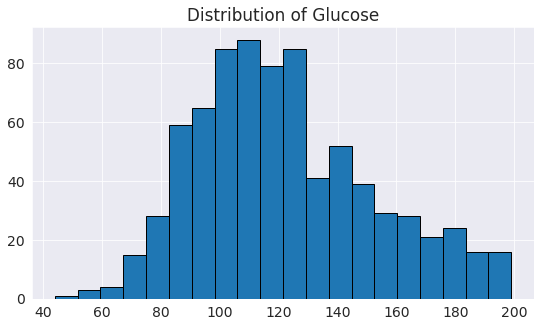

In [ ]:
plt.title("Distribution of Glucose")
plt.hist(df.Glucose,edgecolor = "black", bins=20)

Normal, Prediabetes, and Diabetes Ranges: One common approach is to classify glucose levels into three categories:

* Normal: Glucose levels within a healthy range.
* Prediabetes: Glucose levels that are elevated but not high enough to be classified as diabetes.
* Diabetes: Glucose levels indicative of diabetes.

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
Glucose_Range = pd.Series(["Normal", "Prediabetes", "Diabetes"], dtype = "category")

df["Glucose_Range"] = Glucose_Range

df.loc[df["Glucose"] < 100, "Glucose_Range"] = Glucose_Range[0]

df.loc[(df["Glucose"] > 100) & (df["Glucose"] <= 125), "Glucose_Range"] = Glucose_Range[1]
df.loc[(df["Glucose"] > 126) , "Glucose_Range"] = Glucose_Range[2]

<AxesSubplot:xlabel='Glucose_Range'>

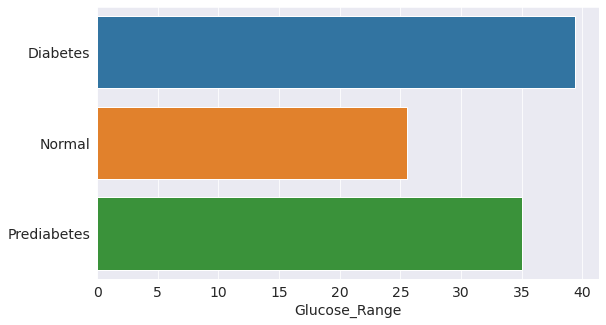

In [ ]:
sns.barplot(x=df.Glucose_Range.value_counts()/df.Glucose_Range.value_counts().sum()*100,
            y=df.Glucose_Range.value_counts().index)

#### BloodPressure

(array([  1.,   2.,   1.,   2.,  12.,  24.,  46.,  74., 127., 137., 100.,
        115.,  51.,  55.,  12.,   7.,   5.,   5.,   1.,   1.]),
 array([ 24. ,  28.9,  33.8,  38.7,  43.6,  48.5,  53.4,  58.3,  63.2,
         68.1,  73. ,  77.9,  82.8,  87.7,  92.6,  97.5, 102.4, 107.3,
        112.2, 117.1, 122. ]),
 <BarContainer object of 20 artists>)

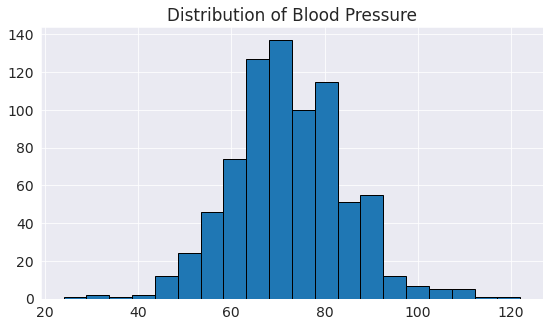

In [ ]:
plt.title("Distribution of Blood Pressure")
plt.hist(df.BloodPressure,edgecolor = "black",bins=20)

In [ ]:
# Create a new categorical variable for BloodPressure
NewBBloodPressure = pd.Series(["Very Low", "Low", "Normal", "Elevated", "Stage 1 Hypertension", "Stage 2 Hypertension"], dtype="category")

# Assign categories based on BloodPressure ranges
df["NewBBloodPressure"] = NewBBloodPressure

df.loc[df["BloodPressure"] < 40, "NewBBloodPressure"] = NewBBloodPressure[0]  # Very Low
df.loc[(df["BloodPressure"] >= 40) & (df["BloodPressure"] < 60), "NewBBloodPressure"] = NewBBloodPressure[1]  # Low
df.loc[(df["BloodPressure"] >= 60) & (df["BloodPressure"] < 80), "NewBBloodPressure"] = NewBBloodPressure[2]  # Normal
df.loc[(df["BloodPressure"] >= 80) & (df["BloodPressure"] < 90), "NewBBloodPressure"] = NewBBloodPressure[3]  # Elevated
df.loc[(df["BloodPressure"] >= 90) & (df["BloodPressure"] < 100), "NewBBloodPressure"] = NewBBloodPressure[4]  # Stage 1 Hypertension
df.loc[df["BloodPressure"] >= 100, "NewBBloodPressure"] = NewBBloodPressure[5]  # Stage 2 Hypertension

<AxesSubplot:xlabel='NewBBloodPressure'>

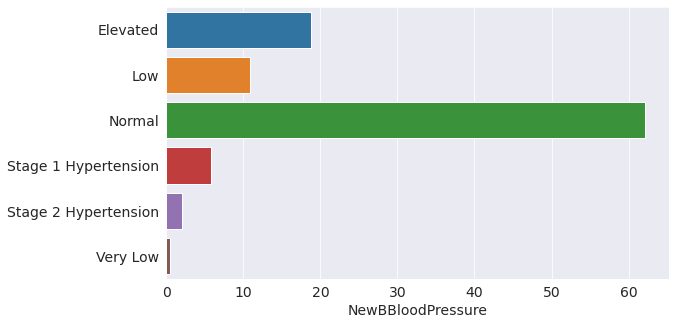

In [ ]:
sns.barplot(x=df.NewBBloodPressure.value_counts()/df.NewBBloodPressure.value_counts().sum()*100,
            y=df.NewBBloodPressure.value_counts().index)

#### SkinThickness

In [ ]:
# According to SkinThickness , some ranges were determined and categorical variables were assigned.
NewSkinThickness  = pd.Series(["Very Thin", "Thin", "Normal", "Thick"], dtype = "category")

df["NewSkinThickness"] = NewSkinThickness

df.loc[df["SkinThickness"] <=10, "NewSkinThickness"] = NewSkinThickness[0]

df.loc[(df["SkinThickness"] > 10)& (df["SkinThickness"] <= 20), "NewSkinThickness"] = NewSkinThickness[1]
df.loc[(df["SkinThickness"] > 20) & (df["SkinThickness"] <= 30),"NewSkinThickness"] = NewSkinThickness[2]
df.loc[(df["SkinThickness"] > 30), "NewSkinThickness"] = NewSkinThickness[3]


<AxesSubplot:xlabel='NewSkinThickness'>

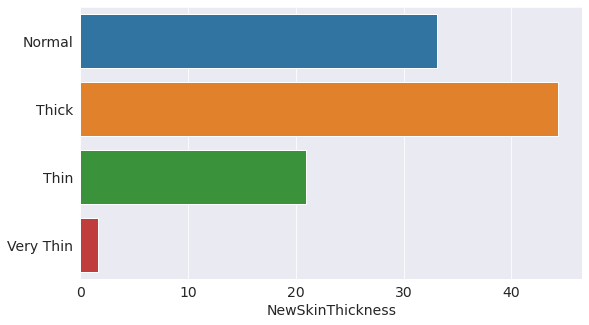

In [ ]:
sns.barplot(x=df.NewSkinThickness.value_counts()/df.NewSkinThickness.value_counts().sum()*100,
            y=df.NewSkinThickness.value_counts().index)

#### BMI

(array([  0.,   0.,   0.,  13.,  94., 179., 236., 151.,  64.,  28.,   7.,
          3.,   1.,   1.,   0.,   0.,   1.,   0.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <BarContainer object of 19 artists>)

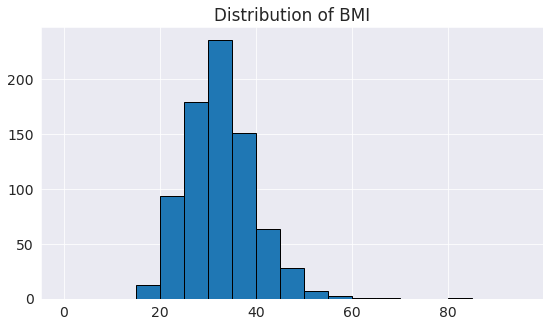

In [ ]:
plt.title("Distribution of BMI")
plt.hist(df.BMI,edgecolor = "black",bins= np.arange(0,100,5))

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.NewBMI.value_counts()

Obesity 1      236
Overweight     179
Obesity 2      151
Obesity 3      105
Normal         103
Underweight      4
Name: NewBMI, dtype: int64

<AxesSubplot:xlabel='NewBMI'>

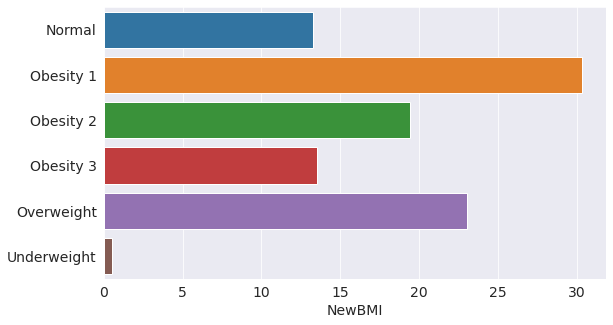

In [ ]:
sns.barplot(x=df.NewBMI.value_counts()/df.NewBMI.value_counts().sum()*100,
            y=df.NewBMI.value_counts().index)

#### DiabetesPedigreeFunction

In [ ]:
# According to DiabetesPedigreeFunction, some ranges were determined and categorical variables were assigned.
Genetic_Risk = pd.Series(["Low", "Moderate", "High"], dtype = "category")

df["Genetic_Risk"] = Genetic_Risk

df.loc[df["DiabetesPedigreeFunction"] < 0.2, "Genetic_Risk"] = Genetic_Risk[0]

df.loc[(df["DiabetesPedigreeFunction"] >= 0.2) & (df["DiabetesPedigreeFunction"] <= 0.5), "Genetic_Risk"] = Genetic_Risk[1]
df.loc[df["DiabetesPedigreeFunction"] > 0.5 ,"Genetic_Risk"] = Genetic_Risk[2]

In [ ]:
df.Genetic_Risk.value_counts()

Moderate    369
High        282
Low         127
Name: Genetic_Risk, dtype: int64

<AxesSubplot:xlabel='Genetic_Risk'>

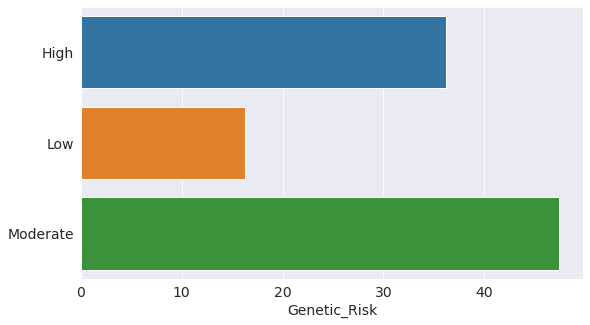

In [ ]:
sns.barplot(x=df.Genetic_Risk.value_counts()/df.Genetic_Risk.value_counts().sum()*100,
            y=df.Genetic_Risk.value_counts().index)

#### Insulin Sensitivity Index


The Insulin Sensitivity Index (ISI) is a measure that quantifies an individual's sensitivity to insulin. It can provide valuable insights into how effectively a person's body is able to use insulin to regulate blood sugar levels. A higher ISI indicates better insulin sensitivity, while a lower ISI may suggest insulin resistance.

ISI can be calculated using a formula that typically involves both glucose and insulin levels. One common method is the Homeostatic Model Assessment for Insulin Resistance (HOMA-IR), which is calculated as (Glucose * Insulin) / 22.5. However, there are various ISI formulas used in research and clinical practice.

In [ ]:
# Calculate the Insulin Sensitivity Index (ISI)
df["Insulin_Sensitivity_Index"] = (df["Glucose"] * df["Insulin"]) / 22.5

(array([213., 119.,  33.,  16.,   9.,   6.,   3.,   0.,   0.,   2.]),
 array([  45.33333333,  751.44      , 1457.54666667, 2163.65333333,
        2869.76      , 3575.86666667, 4281.97333333, 4988.08      ,
        5694.18666667, 6400.29333333, 7106.4       ]),
 <BarContainer object of 10 artists>)

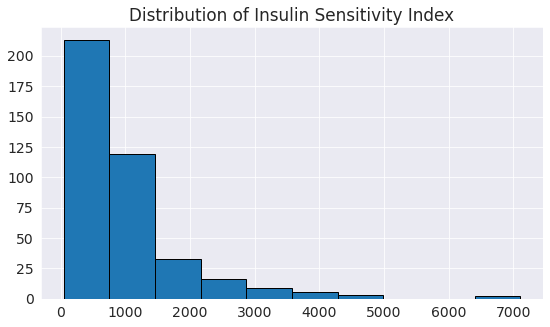

In [ ]:
plt.title("Distribution of Insulin Sensitivity Index")
plt.hist(df.Insulin_Sensitivity_Index,edgecolor = "black")

#### Glucose to Insulin Ratio

The Glucose to Insulin Ratio is a simple calculation that divides the fasting glucose level by the fasting insulin level. This ratio provides information about the balance between glucose and insulin in the blood.

A higher Glucose to Insulin Ratio typically indicates better glucose control and insulin sensitivity, while a lower ratio may suggest insulin resistance or impaired glucose regulation.

This ratio can be used to assess how effectively the body is managing blood sugar in relation to insulin levels. It's particularly valuable in diabetes management and research.

In [ ]:
# Calculate the Glucose to Insulin Ratio
df["Glucose_to_Insulin_Ratio"] = df["Glucose"] / df["Insulin"]

(array([322.,  68.,   3.,   4.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.20666667,  1.47171429,  2.7367619 ,  4.00180952,  5.26685714,
         6.53190476,  7.79695238,  9.062     , 10.32704762, 11.59209524,
        12.85714286]),
 <BarContainer object of 10 artists>)

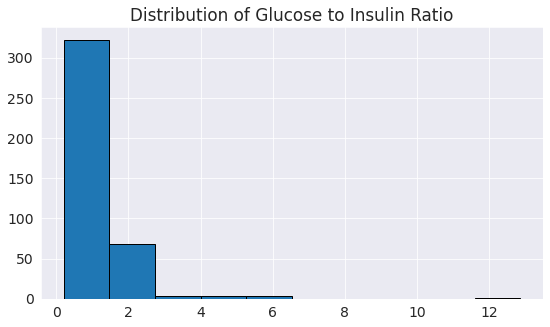

In [ ]:
plt.title("Distribution of Glucose to Insulin Ratio")
plt.hist(df.Glucose_to_Insulin_Ratio,edgecolor = "black")

In [ ]:
df["Glucose_to_Insulin_Ratio"].count()

401

In [ ]:
df["Glucose_to_Insulin_Ratio"].isnull().sum()

377

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewAge,Glucose_Range,NewBBloodPressure,NewSkinThickness,NewBMI,Genetic_Risk,Insulin_Sensitivity_Index,Glucose_to_Insulin_Ratio
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]",Diabetes,Normal,Thick,Obesity 1,High,NaN,NaN
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]",Normal,Normal,Normal,Overweight,Moderate,NaN,NaN
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]",Diabetes,Normal,Normal,Normal,High,NaN,NaN
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]",Normal,Normal,Normal,Overweight,Low,371.822222,0.946809
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]",Diabetes,Low,Thick,Obesity 3,High,1022.933333,0.815476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1,100.0,62.0,NaN,NaN,64.4,0.152,36,0,"(30, 40]",NaN,Normal,NaN,Obesity 3,Low,NaN,NaN
774,0,163.0,40.0,23.0,64.0,40.7,0.322,33,0,"(30, 40]",Diabetes,Low,Normal,Obesity 3,Moderate,463.644444,2.546875
775,6,139.0,84.0,37.0,NaN,50.7,0.320,50,1,"(40, 50]",Diabetes,Elevated,Thick,Obesity 3,Moderate,NaN,NaN
776,2,167.0,44.0,30.0,140.0,52.7,0.452,28,0,"(20, 30]",Diabetes,Low,Normal,Obesity 3,Moderate,1039.111111,1.192857


## Exploratory Analysis and Visualization

In the journey to gain deeper insights from our diabetes dataset, we embark on the phase of exploratory analysis and visualization. This pivotal stage allows us to uncover hidden patterns, understand the distribution of key attributes, and identify potential correlations among variables. Through the lens of data exploration and visualization, we aim to shed light on the intricate dynamics of diabetes risk factors.

This exploration is not only an essential stepping stone but also a dynamic process that encourages us to challenge assumptions and refine our understanding. It's an opportunity to harness the power of data to contribute to the broader understanding of diabetes risk.

### Compute the mean, sum, range and other interesting statistics for numeric columns

Let's see some statistics with the function "describe"

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Sensitivity_Index,Glucose_to_Insulin_Ratio
count,778.000000,778.000000,778.000000,549.000000,401.000000,778.000000,778.000000,778.000000,778.000000,401.000000,401.000000
mean,3.821337,121.951157,72.307198,29.424408,155.965087,32.643573,0.471861,33.347044,0.349614,946.237961,1.163705
std,3.360794,30.470235,12.166561,11.080834,117.997749,7.254152,0.330180,11.789024,0.477155,925.930810,0.965214
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,45.333333,0.206667
25%,1.000000,100.000000,64.000000,22.000000,77.000000,27.600000,0.244000,24.000000,0.000000,360.000000,0.670886
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.374500,29.000000,0.000000,697.244444,0.982143
75%,6.000000,141.000000,80.000000,36.000000,191.000000,36.775000,0.626750,41.000000,1.000000,1160.000000,1.333333
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000,7106.400000,12.857143


As you can see, the df.describe() function provides a concise summary of the statistical properties of the numeric columns in the DataFrame, offering insights into the central tendency, spread, and distribution of the data.

All columns have 778 values, except for "SkinThickness," "Insulin," "Insulin_Sensitivity_Index," and "Glucose_to_Insulin_Ratio." This discrepancy is due to missing values in these columns.

These statistical values, including Mean, Standard Deviation (Std), Minimum (Min), and others, will be useful for further analysis.

Let's take a closer look at the values from the "Insulin" column:

Count: 401.000000
Mean: 155.965087
Std (Standard Deviation): 117.997749
Min (Minimum): 14.000000
25%: 77.000000
50% (Median): 126.000000
75%: 191.000000
Max (Maximum): 846.000000
Notice that the Mean and Median (50%) are relatively separated, and the standard deviation (Std) is quite large within the range of values we are dealing with. This suggests a significant dispersion of the data. If we observe that the Minimum (Min), 50%, and Mean are much closer to each other than the maximum value, it indicates a distribution where data is concentrated at values lower than 191 (the 75th percentile). This type of distribution corresponds to an exponential function.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewAge',
       'Glucose_Range', 'NewBBloodPressure', 'NewSkinThickness', 'NewBMI',
       'Genetic_Risk', 'Insulin_Sensitivity_Index',
       'Glucose_to_Insulin_Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Pregnancies                778 non-null    int64   
 1   Glucose                    778 non-null    float64 
 2   BloodPressure              778 non-null    float64 
 3   SkinThickness              549 non-null    float64 
 4   Insulin                    401 non-null    float64 
 5   BMI                        778 non-null    float64 
 6   DiabetesPedigreeFunction   778 non-null    float64 
 7   Age                        778 non-null    int64   
 8   Outcome                    778 non-null    int64   
 9   NewAge                     777 non-null    category
 10  Glucose_Range              751 non-null    category
 11  NewBBloodPressure          778 non-null    category
 12  NewSkinThickness           550 non-null    category
 13  NewBMI                     778 non-

### **Age** -

Let's create a bar plot to visualize the distribution of the 'Age' column in our dataset of diabetic cases by age group."

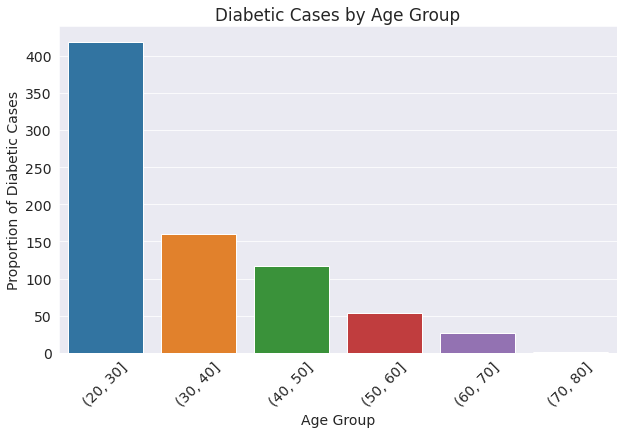

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.NewAge)
plt.title('Diabetic Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Diabetic Cases')
plt.xticks(rotation=45)
plt.show()

The resulting graph visually represents the distribution of "Age" across different age groups, providing a clear and insightful summary of the data's distribution. Each bar in the plot corresponds to an age group, and the height of the bar represents the proportion in that age group.

### **Outcome**


Let's explore how is the distribution of the Outcome column

In [ ]:
df.Outcome.value_counts()

0    506
1    272
Name: Outcome, dtype: int64

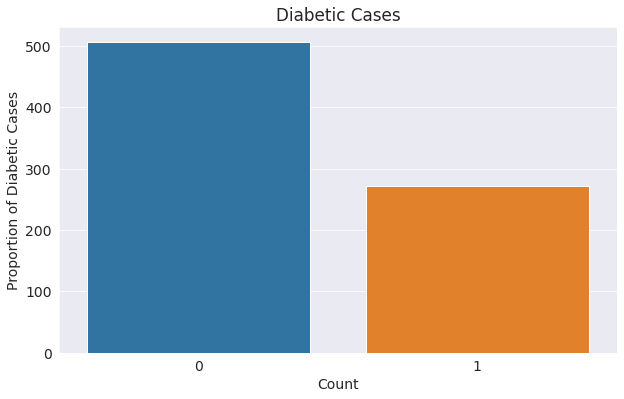

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Diabetic Cases')
plt.xlabel('Count')
plt.ylabel('Proportion of Diabetic Cases')
plt.show()

Out of the 778 cases, we observe that we have 506 negative cases and 272 positive cases of diabetes. This is important to consider for subsequent analyses.

### Explore distributions of numeric columns using histograms


Let's divide our data frame in positive and negative diabetes

In [ ]:
positive_df = df[df.Outcome == 1]
negative_df = df[df.Outcome == 0]

Now, let's use a very useful tool from histograms that allows us to visualize in a single graph the distribution of the column while distinguishing between outcomes, that is, diabetes and non-diabetes.

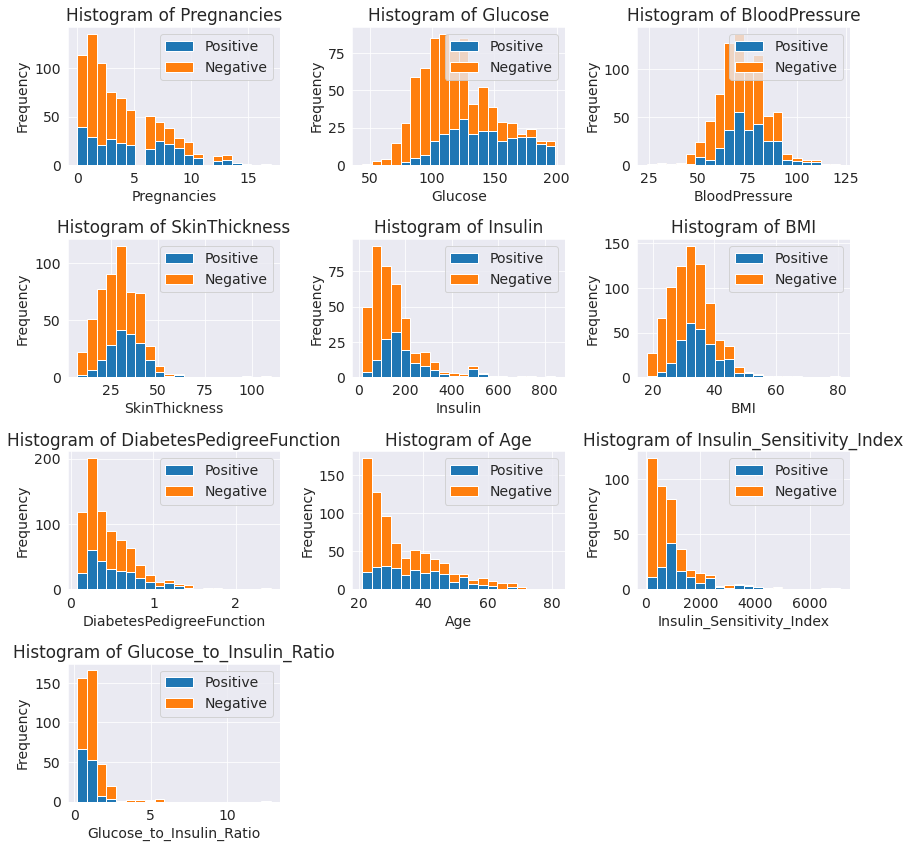

In [ ]:
# Here I select the columns for the histograms
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                      'Age','Insulin_Sensitivity_Index','Glucose_to_Insulin_Ratio']

# Set up the figure and axis
plt.figure(figsize=(12, 12))

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)  # Create a grid of 3x3 plots
    plt.hist([positive_df[feature], negative_df[feature]],bins=20,stacked=True)  # Create the histogram
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(['Positive', 'Negative'])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Now we can observe some interesting things:

* Note that in some graphs, the distributions are very similar, increasing and decreasing the frequency of cases simultaneously. This is the case of: 'Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', and 'Glucose_to_Insulin_Ratio'.

* On the other hand, there are some distributions that are similar but shifted. This is the case for: 'Glucose' and 'Insulin_Sensitivity_Index'.

* There are also different distributions, such as 'Insulin' and 'Age'.

### Pairplot

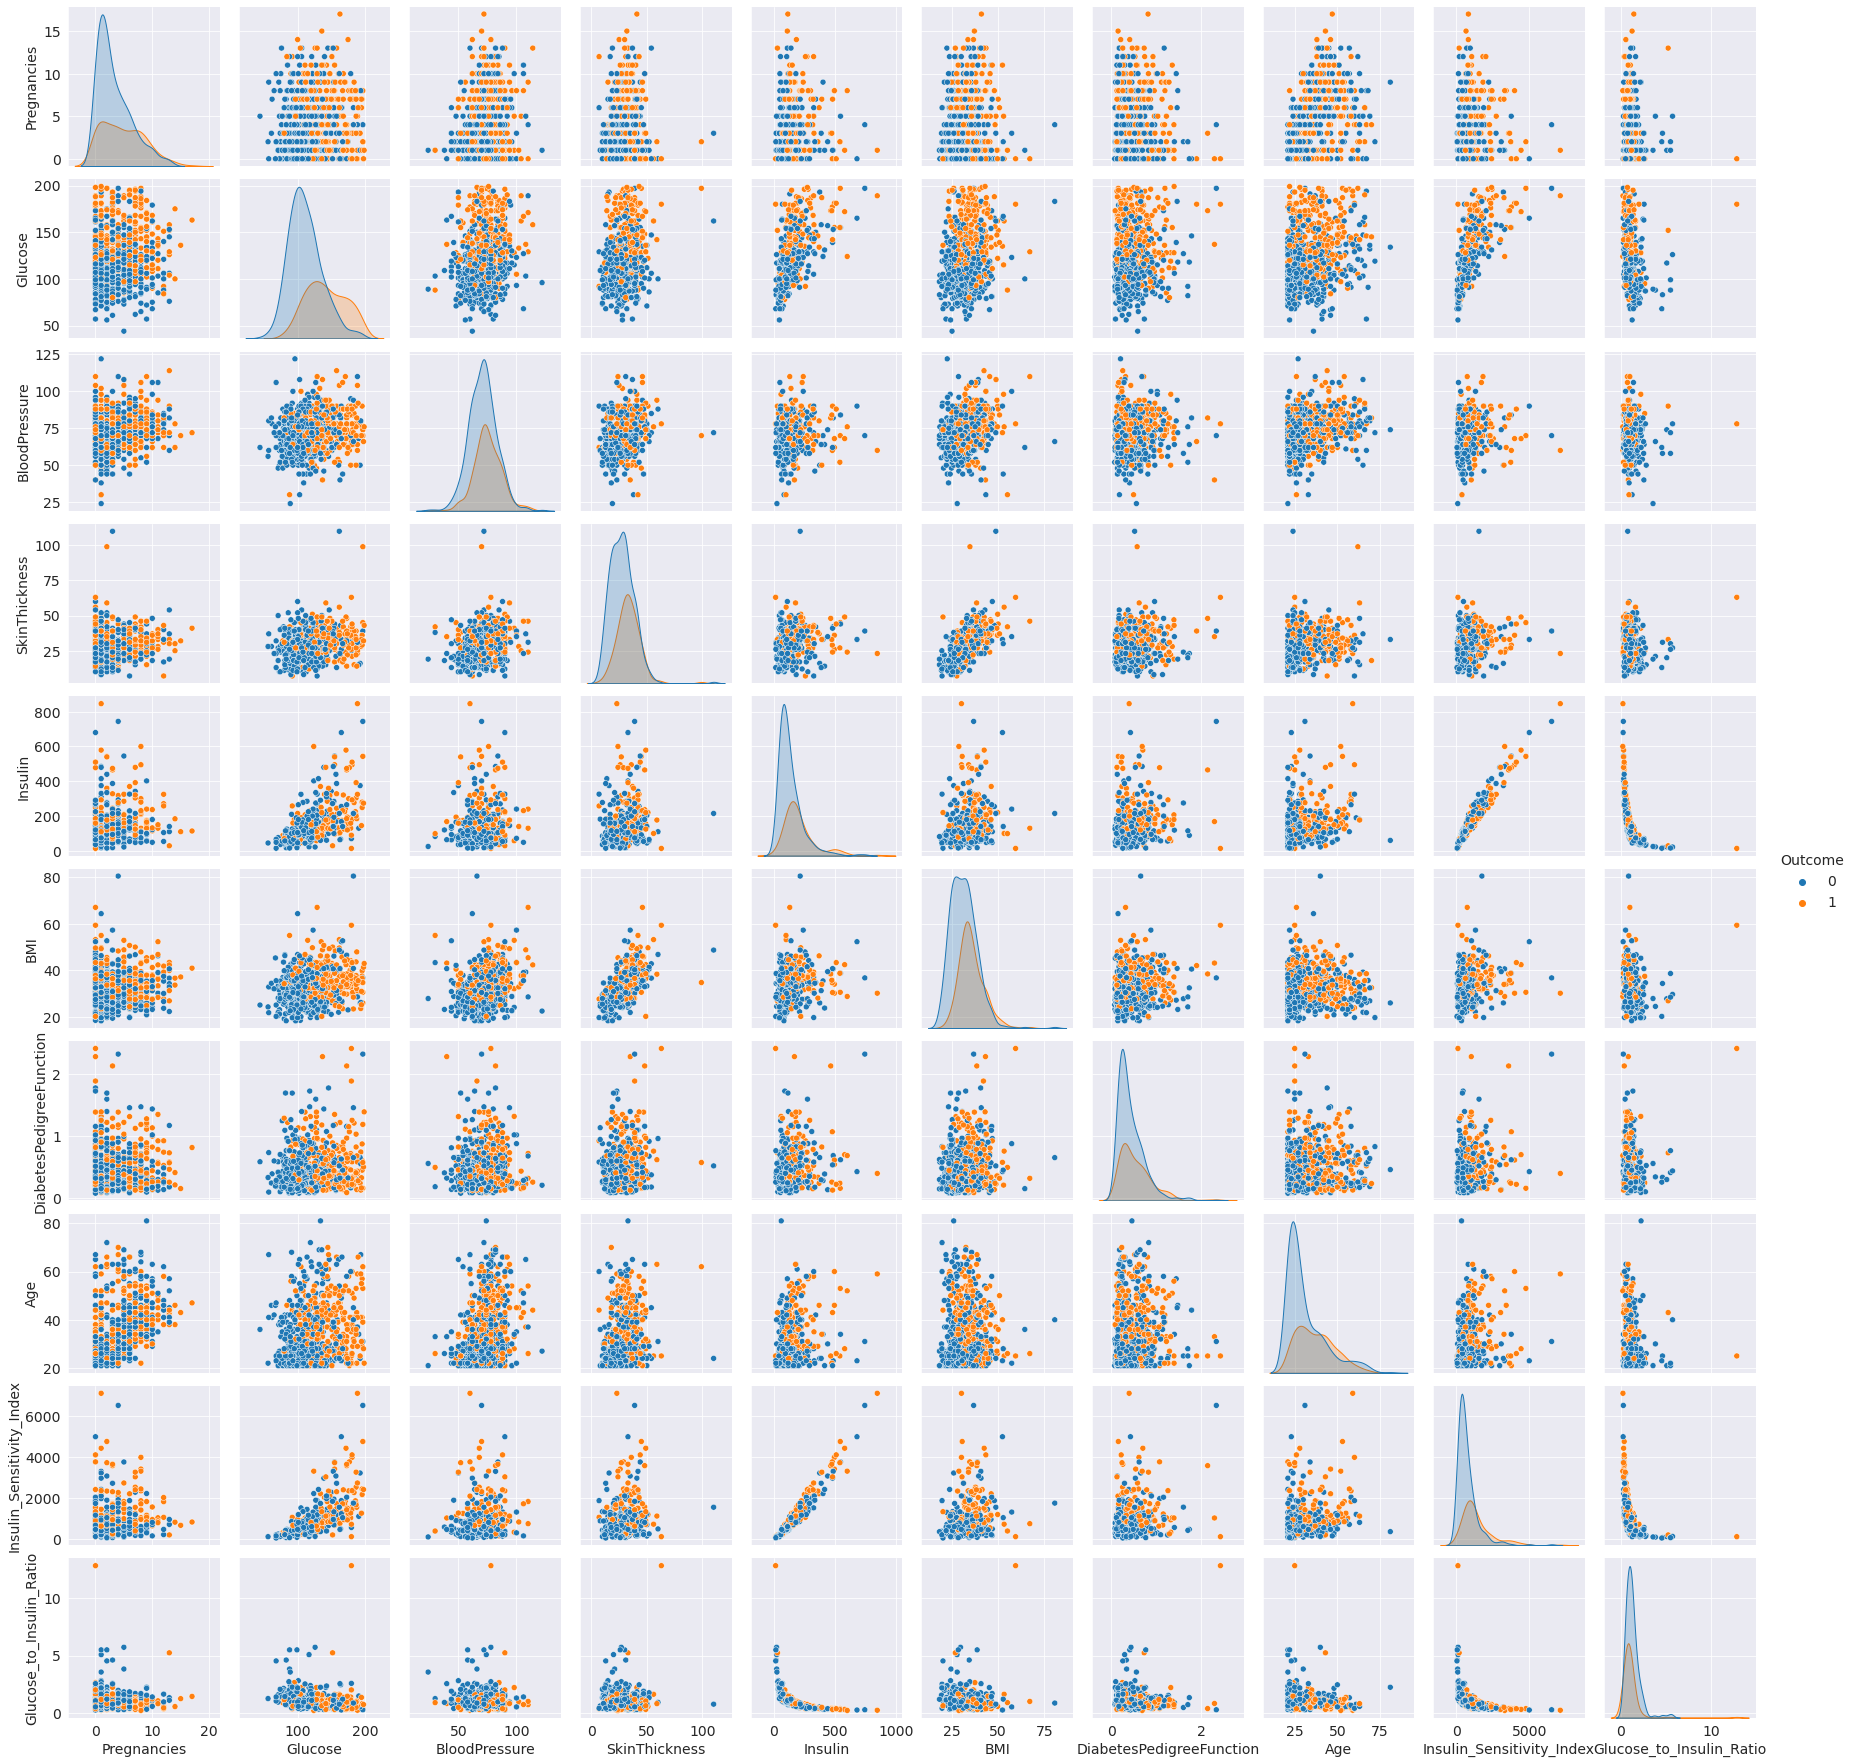

In [ ]:
sns.pairplot(df, hue='Outcome', vars=numerical_features, diag_kind='kde')
plt.show()

Let's see more carefully some graph that show a interesting relation

### **Glucose**

- Let's explore how is the relations of the Glucose with the other columns by plotting some graph below.

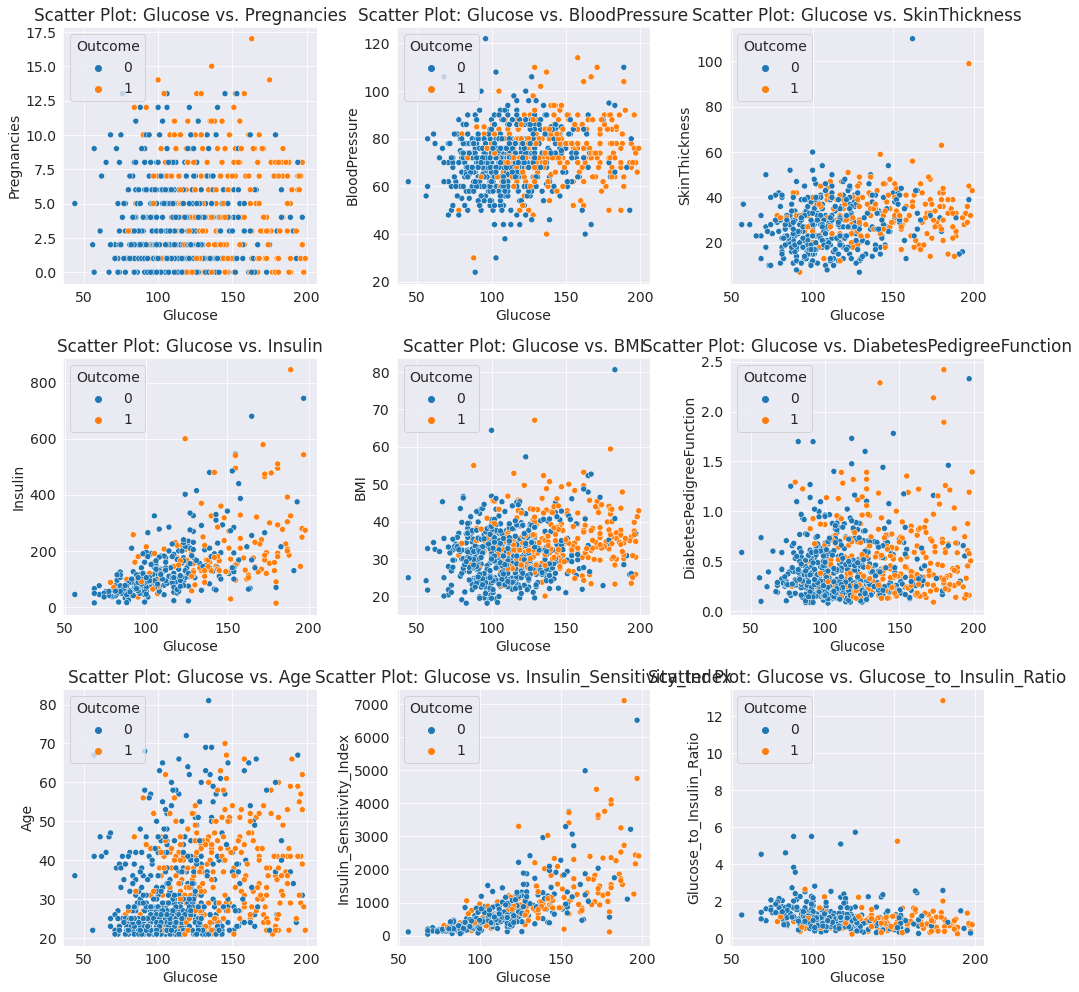

In [ ]:
# Define the column to compare with 'Glucose'
column_to_compare = 'Glucose'

# Define the list of columns to create scatter plots with 'Glucose'
columns_to_plot = ['Pregnancies', 'BloodPressure',
                   'SkinThickness', 'Insulin', 'BMI',
                   'DiabetesPedigreeFunction', 'Age',
                   'Insulin_Sensitivity_Index',
                   'Glucose_to_Insulin_Ratio']
plt.figure(figsize=(14, 14))
# Create individual scatter plots for each column vs. 'Glucose'
for i,col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 plots
    sns.scatterplot(x=column_to_compare, y=col, hue='Outcome', data=df)
    plt.title(f'Scatter Plot: {column_to_compare} vs. {col}')
    plt.xlabel(column_to_compare)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Here, we can observe a strong relationship between the glucose level and the Outcome. The number of positive Outcome cases increases as the glucose values increase.

### Correlation matrix

Let's use the function correlation matrix to explore more the relation between ours values.

The code below generates a heatmap of a correlation matrix for the numeric columns in the dataset. The correlation matrix quantifies the relationships between pairs of numeric variables. In the heatmap, warmer colors represent positive correlations, while cooler colors represent negative correlations. The values within the cells indicate the strength of these correlations. This visualization helps to identify potential associations between variables, which can be crucial for understanding the data and making informed decisions in data analysis and modeling.

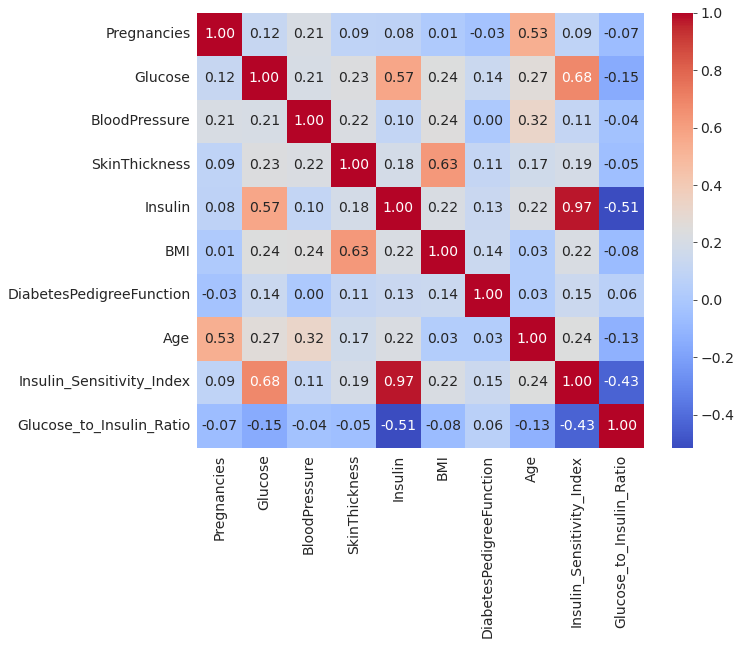

In [ ]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Let's remark some interesting values:
* Outcome:
    * Glucose: 0.48
    * Insuline Sensitivity Index: 0.34
    * Insuline: 0.30
    * BMI: 0.28
* Glucose:
    * Insuline Sensitivity Index:0.68
    * Insulin: 0.57
    

### Insulin vs. Insulin_Sensitivity_Index and Glucose_to_Insulin_Ratio

Let's analyze the graphs that depict the relationship between Insulin vs. Insulin_Sensitivity_Index and Glucose_to_Insulin_Ratio

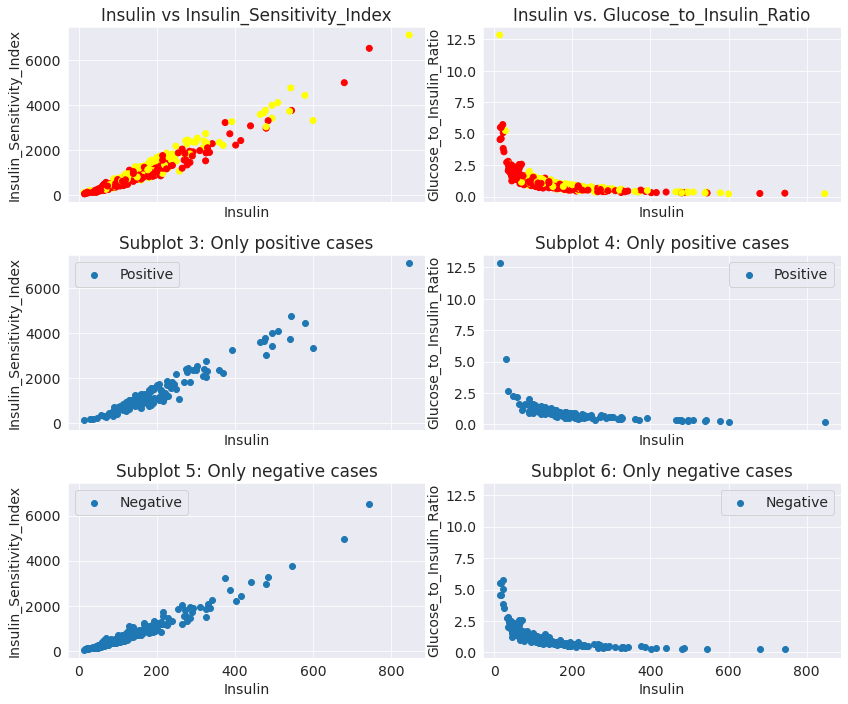

In [ ]:
# Create a 3x2 grid of subplots

fig, axes = plt.subplots(3, 2, figsize=(12, 10),sharex='col', sharey='col')

# Populate the first subplot (top-left)
scatter_plot = axes[0, 0].scatter(x='Insulin',
                                  y='Insulin_Sensitivity_Index',
                                  c='Outcome',
                                  cmap='autumn',data=df)
axes[0, 0].set_title('Insulin vs Insulin_Sensitivity_Index')
axes[0, 0].set_xlabel('Insulin')
axes[0, 0].set_ylabel('Insulin_Sensitivity_Index')



# Populate the second subplot (top-right)
scatter_plot = axes[0, 1].scatter(x='Insulin',
                                  y='Glucose_to_Insulin_Ratio',
                                  c='Outcome',
                                  cmap='autumn', data=df)
axes[0, 1].set_title('Insulin vs. Glucose_to_Insulin_Ratio')
axes[0, 1].set_xlabel('Insulin')
axes[0, 1].set_ylabel('Glucose_to_Insulin_Ratio')

# Populate the third subplot (middle-left)
scatter_plot = axes[1, 0].scatter(x='Insulin',
                                  y='Insulin_Sensitivity_Index',
                                  data=positive_df)
axes[1, 0].set_title('Subplot 3: Only positive cases')
axes[1, 0].set_xlabel('Insulin')
axes[1, 0].set_ylabel('Insulin_Sensitivity_Index')
axes[1, 0].legend(['Positive'])


# Populate the fourth subplot (middle-right)
scatter_plot = axes[1, 1].scatter(x='Insulin',
                                  y='Glucose_to_Insulin_Ratio',
                                  data=positive_df)
axes[1, 1].set_title('Subplot 4: Only positive cases')
axes[1, 1].set_xlabel('Insulin')
axes[1, 1].set_ylabel('Glucose_to_Insulin_Ratio')
axes[1, 1].legend(['Positive'])

# Populate the fifth subplot (down-left)
scatter_plot = axes[2, 0].scatter(x='Insulin',
                                  y='Insulin_Sensitivity_Index',
                                  data=negative_df)
axes[2, 0].set_title('Subplot 5: Only negative cases')
axes[2, 0].set_xlabel('Insulin')
axes[2, 0].set_ylabel('Insulin_Sensitivity_Index')
axes[2, 0].legend(['Negative'])


# Populate the sixth subplot (down-right)
scatter_plot = axes[2, 1].scatter(x='Insulin',
                                  y='Glucose_to_Insulin_Ratio',
                                  data=negative_df)
axes[2, 1].set_title('Subplot 6: Only negative cases')
axes[2, 1].set_xlabel('Insulin')
axes[2, 1].set_ylabel('Glucose_to_Insulin_Ratio')
axes[2, 1].legend(['Negative'])

# Add space between subplots
plt.tight_layout()

# Show the entire figure
plt.show()

**Note**
* Insulin Sensitivity Index: A higher ISI indicates better insulin sensitivity, while a lower ISI may suggest insulin resistance.

* Glucose to Insulin Ratio: A higher Glucose to Insulin Ratio typically indicates better glucose control and insulin sensitivity, while a lower ratio may suggest insulin resistance or impaired glucose regulation.

**Observation**

As we can see in the graphs above there a tendence in the values:
* **Subplot Column 1**: Insulin vs Insulin_Sensitivity_Index
    * We observe that for the same 'Insulin' values, those with a higher 'Insulin Sensitivity Index' tend to have diabetes (Outcome=1).
    * We can see that the data points cluster along a diagonal line. For both positive and negative cases of diabetes, as 'Insulin' values increase, the 'Insulin Sensitivity Index' increases proportionally. This behavior aligns with the formula used to calculate the Insulin Sensitivity Index.
    
* **Subplot Column 2**: Insulin vs. Glucose_to_Insulin_Ratio
    * We can observe that the majority of values are concentrated at 'Glucose to Insulin Ratio' values less than 2 and 'Insulin' values less than 200.
    * We notice that for low 'Glucose to Insulin Ratio' values and higher 'Insulin' values, there is a higher density of diabetes cases.

### Glucose vs. Insulin_Sensitivity_Index and Glucose_to_Insulin_Ratio

Let's analyze the graphs that depict the relationship between Glucose vs. Insulin_Sensitivity_Index and Glucose_to_Insulin_Ratio

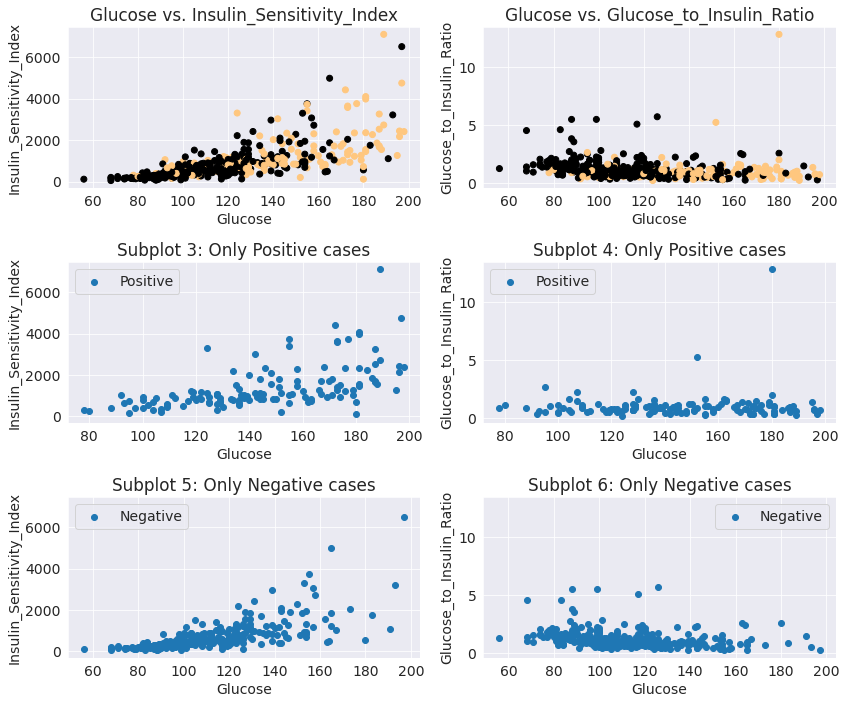

In [ ]:
# Create a 2x2 grid of subplots

fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharey='col')

# Populate the first subplot (top-left)
scatter_plot = axes[0, 0].scatter(x='Glucose',
                                  y='Insulin_Sensitivity_Index',
                                  c='Outcome',
                                  cmap='copper',data=df)
axes[0, 0].set_title('Glucose vs. Insulin_Sensitivity_Index')
axes[0, 0].set_xlabel('Glucose')
axes[0, 0].set_ylabel('Insulin_Sensitivity_Index')


# Populate the second subplot (top-right)
scatter_plot = axes[0, 1].scatter(x='Glucose',
                                  y='Glucose_to_Insulin_Ratio',
                                  c='Outcome',
                                  cmap='copper',data=df)
axes[0, 1].set_title('Glucose vs. Glucose_to_Insulin_Ratio')
axes[0, 1].set_xlabel('Glucose')
axes[0, 1].set_ylabel('Glucose_to_Insulin_Ratio')


# Populate the third subplot (down-left)
scatter_plot = axes[1, 0].scatter(x='Glucose',
                                  y='Insulin_Sensitivity_Index',
                                  data=positive_df)
axes[1, 0].set_title('Subplot 3: Only Positive cases')
axes[1, 0].set_xlabel('Glucose')
axes[1, 0].set_ylabel('Insulin_Sensitivity_Index')
axes[1, 0].legend(['Positive'])


# Populate the fourth subplot (down-right)
scatter_plot = axes[1, 1].scatter(x='Glucose',
                                  y='Glucose_to_Insulin_Ratio',
                                  data=positive_df)
axes[1, 1].set_title('Subplot 4: Only Positive cases')
axes[1, 1].set_xlabel('Glucose')
axes[1, 1].set_ylabel('Glucose_to_Insulin_Ratio')
axes[1, 1].legend(['Positive'])

# Populate the fifth subplot (down-left)
scatter_plot = axes[2, 0].scatter(x='Glucose',
                                  y='Insulin_Sensitivity_Index',
                                  data=negative_df)
axes[2, 0].set_title('Subplot 5: Only Negative cases')
axes[2, 0].set_xlabel('Glucose')
axes[2, 0].set_ylabel('Insulin_Sensitivity_Index')
axes[2, 0].legend(['Negative'])


# Populate the sixth subplot (down-right)
scatter_plot = axes[2, 1].scatter(x='Glucose',
                                  y='Glucose_to_Insulin_Ratio',
                                  data=negative_df)
axes[2, 1].set_title('Subplot 6: Only Negative cases')
axes[2, 1].set_xlabel('Glucose')
axes[2, 1].set_ylabel('Glucose_to_Insulin_Ratio')
axes[2, 1].legend(['Negative'])

# Add space between subplots
plt.tight_layout()

# Show the entire figure
plt.show()

**Note**
* Insulin Sensitivity Index: A higher ISI indicates better insulin sensitivity, while a lower ISI may suggest insulin resistance.

* Glucose to Insulin Ratio: A higher Glucose to Insulin Ratio typically indicates better glucose control and insulin sensitivity, while a lower ratio may suggest insulin resistance or impaired glucose regulation.

**Observation**

As we can see in the graphs above, there is a noticeable trend in the values:

* **Subplot column 1**: Glucose vs. Insulin_Sensitivity_Index
    * We observe that as the 'Glucose' values increase, there are more cases of diabetes (Outcome=1).
    * As the 'Glucose' values increase, the dispersion of the data with respect to the 'Insulin Sensitivity Index' also increases.
    * When we examine the graph for negative cases, we can observe a higher density of data points at normal glucose values (around 80 and 120).
    
* **Subplot column 2**: Glucose vs. Glucose_to_Insulin_Ratio
    * We notice that the majority of 'Glucose to Insulin Ratio' values fall between 0 and 2. Additionally, as 'Glucose' values increase, we observe a higher number of diabetes cases.
    * When we examine the graph for negative cases, we can observe a higher density of data points at normal glucose values (around 80 and 120).

## Asking and Answering Questions

In this section, we delve deeper into our dataset, armed with the knowledge and insights gained from our exploratory data analysis. We aim to pose several intriguing questions about the data and subsequently answer them.

#### Q1: For individuals aged 20 to 40 with a normal BMI, what is the distribution of glucose levels, and how does it differ between those with and without diabetes?


To answer the question, we will begin by creating a box plot to observe the distribution of 'Glucose' levels concerning the 'Outcome' variable. Since we are specifically interested in visualizing the distribution of data for individuals whose 'Age' falls within the range of 20 to 40 and who have a 'BMI' value within normal parameters, we will filter our dataset based on these conditions.

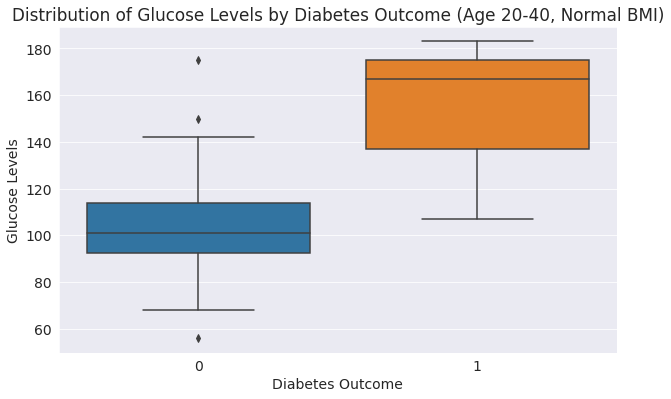

In [ ]:
# Filter the dataset for individuals with the specified conditions
filtered_data = df[(df['Age'] >= 20) & (df['Age'] <= 40) & (df['NewBMI'] == 'Normal')]

# Create a box plot to visualize the distribution of glucose levels by Outcome (diabetes)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=filtered_data)
plt.title('Distribution of Glucose Levels by Diabetes Outcome (Age 20-40, Normal BMI)')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Levels')
plt.show()

A significant difference in the data distribution is evident, with the distribution of 'Outcome' = 0 (no diabetes) appearing relatively normal. However, in the case of 'Outcome' = 1 (diabetes), the box plot is shifted towards higher values. This prompts us to delve deeper into this particular set of data.

In [ ]:
filtered_data['Outcome'].value_counts()

0    78
1     3
Name: Outcome, dtype: int64

We observe that for individuals whose 'Age' falls within the range of 20 to 40 and who have a 'BMI' value within normal parameters, the majority of 'Outcome' values are 0 (indicating no diabetes), with only 3 cases showing diabetes. Let's visualize these 3 cases.

In [ ]:
filtered_data.loc[filtered_data['Outcome']== 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewAge,Glucose_Range,NewBBloodPressure,NewSkinThickness,NewBMI,Genetic_Risk,Insulin_Sensitivity_Index,Glucose_to_Insulin_Ratio
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]",Diabetes,Normal,Normal,Normal,High,NaN,NaN
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23,1,"(20, 30]",Prediabetes,Normal,Thin,Normal,High,228.266667,2.229167
646,1,167.0,74.0,17.0,144.0,23.4,0.447,33,1,"(30, 40]",Diabetes,Normal,Thin,Normal,Moderate,1068.800000,1.159722


Finally, it could be interesting to represent this with a histogram.

In [ ]:
filtered_data_positive = positive_df[(positive_df['Age'] >= 20) & (positive_df['Age'] <= 40) & (positive_df['NewBMI'] == 'Normal')]
filtered_data_negative = negative_df[(negative_df['Age'] >= 20) & (negative_df['Age'] <= 40) & (negative_df['NewBMI'] == 'Normal')]

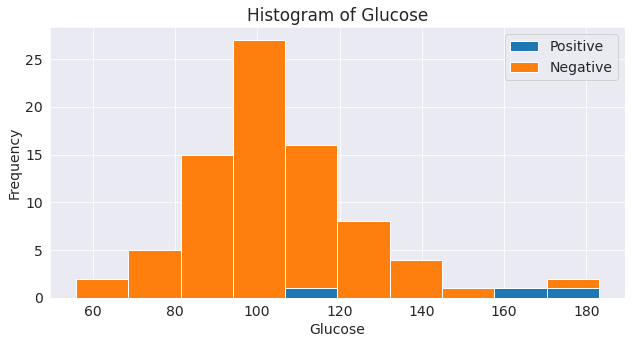

In [ ]:
plt.hist([filtered_data_positive["Glucose"], filtered_data_negative["Glucose"]], stacked=True)  # Create the histogram
plt.title('Histogram of Glucose')
plt.xlabel("Glucose")
plt.ylabel('Frequency')
plt.legend(['Positive', 'Negative'])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

We conclude that for individuals whose 'Age' falls within the range of 20 to 40 and who have a 'BMI' value within normal parameters, the majority of 'Outcome' values are 0 (indicating no diabetes), and the 'Glucose' values exhibit a normal distribution within the normal range. However, there are only 3 cases showing diabetes, and they have significantly higher 'Glucose' values.

#### Q2: Is there a relationship between the number of pregnancies and age in the dataset?

To answer the question, we will create a scatter plot to observe the distribution of the 'Age' vs. 'Pregnancies' variables. I find it interesting to group the visualization into age ranges, each represented with a different color.

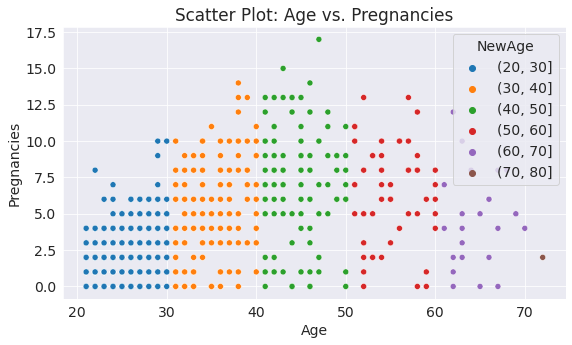

In [ ]:
# Scatter plots
sns.scatterplot(x='Age' , y='Pregnancies',hue='NewAge', data=df)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatter Plot: Age vs. Pregnancies')
plt.show()

We can observe that in the range of 'Age' values between 20 and 30, and 'Pregnancies' values between 0 and 5, there is a higher density of data. We practically see data in all possible combinations (many data points). Similarly, for 'Age' between 30 and 40, and 'Pregnancies' between 4 and 10, a similar pattern emerges. This leads me to believe that it's worth delving deeper into this.

Let's create a countplot to visualize the distribution of these two columns.

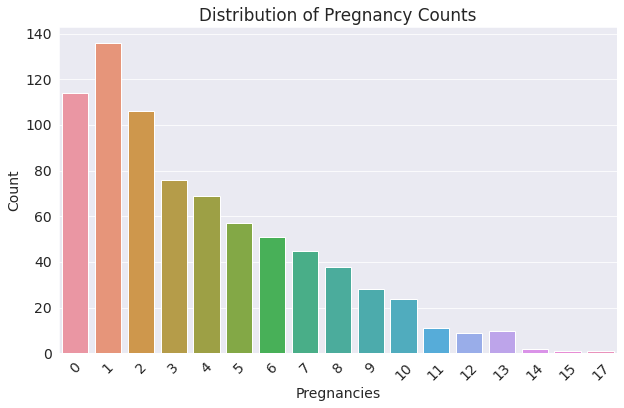

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Pregnancies", data=df)
plt.title('Distribution of Pregnancy Counts')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

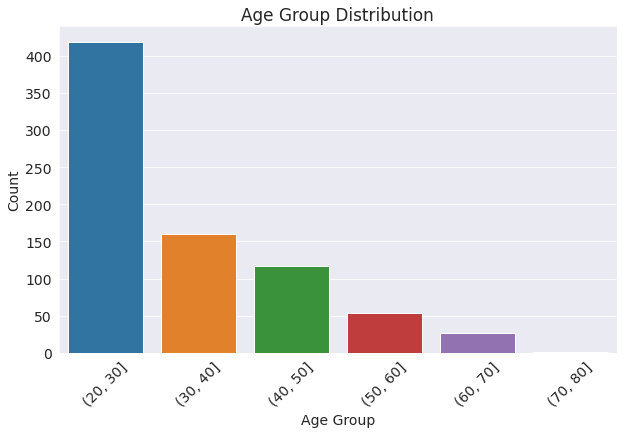

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="NewAge", data=df)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can observe that for both the 'Age' and 'Pregnancies' columns, there is a higher concentration of cases with lower values. In the case of 'Age,' there are approximately 550 cases within the ranges of 20 to 30 and 30 to 40. Similarly, for 'Pregnancies,' the majority of cases fall within the range of 0 to 6.
Let's create a graph that allows us to visualize this.

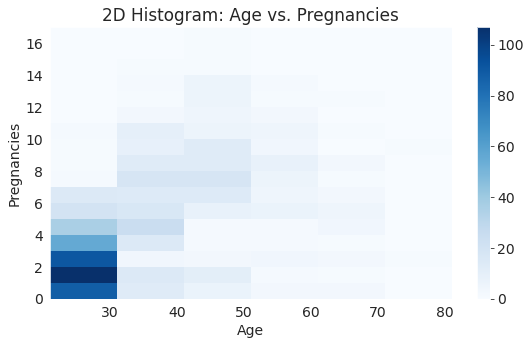

In [ ]:
# Select the columns of interest
age_data = df['Age']
pregnancies_data = df['Pregnancies']

# Create a 2D histogram
plt.hist2d(age_data, pregnancies_data, bins=(6, 17), cmap='Blues')

# Add labels and a color bar
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('2D Histogram: Age vs. Pregnancies')
plt.colorbar()

plt.show()

The created graph is a two-dimensional histogram that allows us to observe the number of cases with that combination of values. It's important to note that the 'Age' values in our dataset are greater than 20. The intensity of blue indicates the data count for each combination of values. We can see that the intensity of blue is higher for lower values.

In [ ]:
# Calculate the correlation coefficient between "BMI" and "Insulin"
correlation_coefficient = df['Age'].corr(df['Pregnancies'])

print(f"Correlation Coefficient between Age and Pregnancies: {correlation_coefficient}")

Correlation Coefficient between Age and Pregnancies: 0.5329926458707709


We can see that the correlation coefficient is quite high.


#### Q3: Are there any correlations between BMI and insulin levels?

We'll calculate the correlation coefficient between 'BMI' and 'Insulin' and then visualize it using a scatter plot.

In [ ]:
# Calculate the correlation coefficient between "BMI" and "Insulin"
correlation_coefficient = df['BMI'].corr(df['Insulin'])

print(f"Correlation Coefficient between BMI and Insulin: {correlation_coefficient}")

Correlation Coefficient between BMI and Insulin: 0.21795048576090292


The coefficient above is the Pearson correlation coefficient, which indicates the strength and direction of the linear relationship between the two variables. The value can range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

The value of 0.217 is relatively low. Let's look at a graph for better clarity.

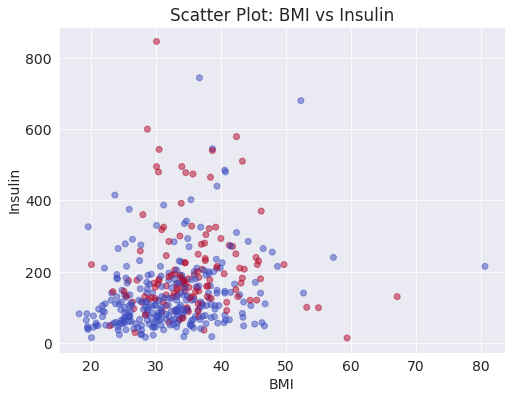

In [ ]:
# Create a scatter plot of BMI vs Insulin
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['Insulin'],c=df['Outcome'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot: BMI vs Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.grid(True)

plt.show()

We can observe a higher data density for 'BMI' values between 20 and 40, with 'Insulin' levels below 200. It appears as though there is an imaginary diagonal trend where values tend to cluster, although the dispersion remains substantial. Consequently, we conclude that there isn't a very clear relationship between these columns. At the same time, we notice a larger number of cases without diabetes, and it seems that for 'Insulin' values exceeding 150, there's an increasing presence of positive diabetes cases.

#### Q4: How does the variation in the Diabetes Pedigree Function differ among various age groups, considering it in relation to 'Outcome'?

Let's create a box plot of 'Age' vs. 'DiabetesPedigreeFunction,' separated by the 'Outcome' value.

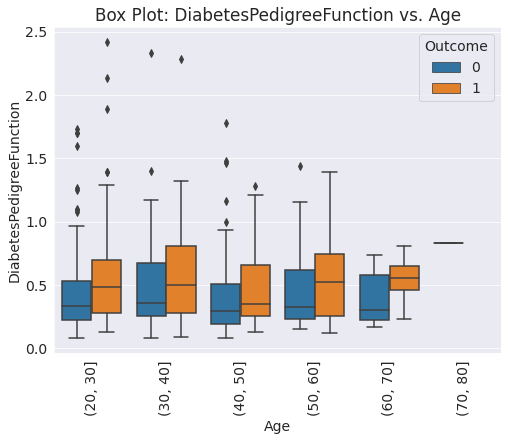

In [ ]:
# Create a box plot to visualize the distribution of "DiabetesPedigreeFunction" across age groups
plt.figure(figsize=(8, 6))
sns.boxplot(x=age_bins, y='DiabetesPedigreeFunction',hue='Outcome', data=df)
plt.title('Box Plot: DiabetesPedigreeFunction vs. Age')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

We can observe that for each of the different age intervals, the distribution (box) of 'DiabetesPedigreeFunction' corresponding to 'Outcome' = 1, indicating diabetes, is shifted towards higher values of 'DiabetesPedigreeFunction'.

Let's create a scatter plot to conclude this analysis and visualize the data density.

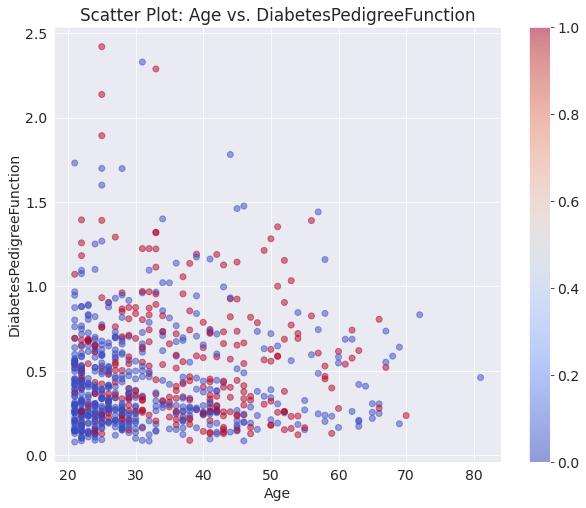

In [ ]:
# Create a scatter plot of "Age" vs. "DiabetesPedigreeFunction"
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'], df['DiabetesPedigreeFunction'],c=df['Outcome'],cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot: Age vs. DiabetesPedigreeFunction')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.colorbar()
plt.grid(True)
plt.show()

As expected, in line with everything observed in this report, we can see a higher density of points for lower values from both variables, with a predominance of negative diabetes outcomes.

#### Q5: What is the distribution of blood pressure (diastolic) among individuals with and without diabetes, and are there significant differences for older 40 and younger 40?

We'll use box plots to visualize and compare 'BloodPressure' concerning 'Outcome,' while also distinguishing between those older than 40 and those younger than 40.

Let's create a new column that categorize 'Age' in 'age_up_to_40' and 'Age_more_than_40'

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
Age_Range = pd.Series(["Age_up_to_40", "Age_more_than_40"], dtype = "category")

df["Age_div_40"] = Age_Range

df.loc[df["Age"] <= 40, "Age_div_40"] = Age_Range[0]
df.loc[(df["Age"] > 40) , "Age_div_40"] = Age_Range[1]

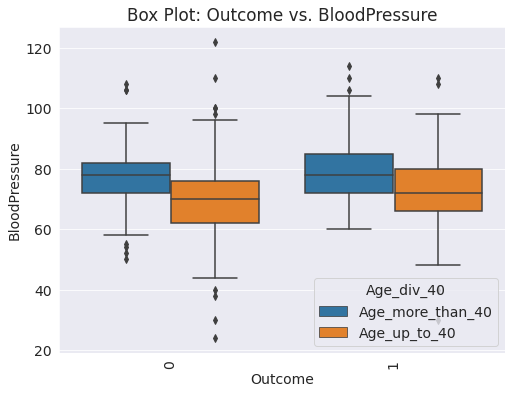

In [ ]:
# Create a box plot to visualize the distribution of "DiabetesPedigreeFunction" across age groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome',y='BloodPressure', hue='Age_div_40',data=df)
plt.title('Box Plot: Outcome vs. BloodPressure')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

As we can observe, the distributions (boxes) of 'BloodPressure' for 'Age_more_than_40,' both for positive and negative 'Outcome,' are shifted towards higher values compared to the distribution of 'Age_up_to_40'.  

Let's create a histogram of 'BloodPressure' vs. 'Age' (both above and below 40) to help us visualize this relationship

In [ ]:
# First we separate our dataframe by 'Age' (more and less 40)
older_than_40_df = df[df['Age'] > 40]
younger_than_40_df = df[df['Age'] <= 40]

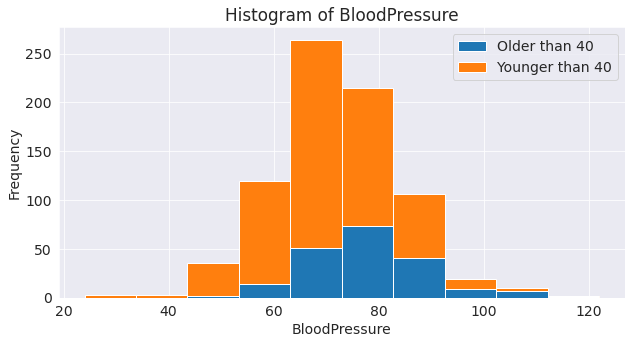

In [ ]:
# Now let's make and visualize the histogram
plt.hist([older_than_40_df["BloodPressure"], younger_than_40_df["BloodPressure"]], stacked=True)  # Create the histogram
plt.title('Histogram of BloodPressure')
plt.xlabel("BloodPressure")
plt.ylabel('Frequency')
plt.legend(['Older than 40', 'Younger than 40'])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

As we can observe, the blue distribution representing cases 'older than 40' is shifted towards higher 'BloodPressure' values compared to the distribution of 'younger than 40'.

## Inferences and Conclusion

Throughout this analysis, we've delved into various aspects of our dataset to gain insights into the factors related to diabetes and their interplay. We began by exploring the distributions of different variables and visualizing relationships between them.

* One of the key observations was the prevalence of diabetes among individuals with higher glucose levels. As 'Glucose' values increased, the likelihood of positive 'Outcome' also increased, suggesting a strong connection between elevated glucose levels and diabetes.

* Further, we looked at the correlation between 'BMI' and 'Insulin,' which revealed a relatively low correlation coefficient of 0.217. This indicated that the two variables do not have a strong linear relationship. A scatter plot confirmed this, showing a dispersed distribution of data points.

* We then explored the relationship between 'Age' and 'Pregnancies,' revealing that most data points clustered within specific ranges. We noted a higher density of cases in the age groups 20-30 and 30-40, where 'Pregnancies' were in the range of 0-5. This distribution prompted further investigation.

* In a more detailed analysis, we examined how the 'Diabetes Pedigree Function' varied across different age groups, particularly in relation to 'Outcome.' The box plots showed a noticeable difference in 'Diabetes Pedigree Function' between individuals with and without diabetes. Diabetic cases tended to have higher values of this function across age groups.

* We also investigated 'BloodPressure' and its relationship with 'Outcome,' differentiating between age groups above and below 40. The box plots indicated that 'BloodPressure' values were generally higher in cases 'older than 40,' both for those with positive and negative 'Outcome.'

* Lastly, we used histograms to visualize these relationships, which provided additional insights into the distribution of 'BloodPressure' in different age groups.

In conclusion, our analysis suggests a strong association between elevated 'Glucose' levels and the presence of diabetes. It also indicates that 'Diabetes Pedigree Function' tends to be higher in individuals with diabetes across various age groups. 'BMI' and 'Insulin' do not exhibit a strong linear relationship. 'BloodPressure' appears to be higher in individuals 'older than 40,' and we've observed certain age groups with a higher prevalence of diabetes.

These findings can be valuable in understanding the risk factors and patterns associated with diabetes within this dataset. They provide a foundation for further research and targeted interventions to mitigate the risks of diabetes among specific age groups and individuals with particular characteristics.

It's worth mentioning that, for the analysis conducted, we utilized several Python tools and libraries, including pandas, matplotlib (plt), and seaborn (sns). Through this process, we had the opportunity to witness firsthand the potential and possibilities these tools offer. This experience underscored their versatility and effectiveness in extracting insights and drawing meaningful conclusions from the dataset. It serves as a testament to the power of data analysis in gaining a deeper understanding of the factors related to diabetes and provides a solid foundation for further investigations and informed decision-making.

## References and Future Work

In the course of this analysis, we've drawn upon various resources and insights that have deepened our understanding of the dataset and its implications for the study of diabetes. For reference, we recommend the following resources:

* Python Data Science Libraries: The analysis was made possible by the use of Python libraries, including pandas, matplotlib, and seaborn. These libraries offer a wealth of functionalities for data manipulation, visualization, and analysis. We encourage further exploration of these libraries to unlock additional insights and conduct more advanced analyses.

* Scikit-Learn: For those interested in machine learning applications, Scikit-Learn is a powerful Python library. It provides tools for building predictive models, such as classification and regression, which could be applied to this dataset for more sophisticated analysis.

As for future work, there are several promising avenues to explore using this dataset:

* Predictive Modeling: Building predictive models to identify potential diabetes cases based on the dataset's features, such as glucose levels, age, and BMI. Techniques like logistic regression, decision trees, and support vector machines can be applied.

* Feature Engineering: Exploring additional feature engineering to extract more valuable insights from the data. Creating new features or transforming existing ones can enhance the predictive power of models.

* Data Collection: Expanding the dataset with additional relevant features or incorporating data from other sources can offer a more comprehensive view of diabetes risk factors.

* Healthcare Research: Collaborating with healthcare professionals to gain a clinical perspective on the dataset and its real-world applications in diabetes research.

* Educational Initiatives: Utilizing the dataset as a learning resource for data science and analytics education. It can serve as a valuable dataset for teaching and hands-on practice.

In conclusion, this analysis has laid a solid foundation for further exploration and applications in the domain of diabetes research and data analysis. We encourage researchers, data scientists, and healthcare professionals to leverage this dataset and resources to contribute to the ongoing study of diabetes and its related factors.